In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


### Analisando os Dados

In [2]:
df = pd.read_csv("../data/cinema_processed.csv")

df.describe().round(1)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Faixa_etaria
count,898.0,898.0,898.0,898.0,898.0,898.0,898.0
mean,1993.0,124.2,7.9,77.6,295491.4,65717749.2,1.1
std,21.8,28.4,0.3,11.5,329832.7,105699422.4,0.8
min,1921.0,45.0,7.6,28.0,25088.0,1305.0,0.0
25%,1980.0,104.0,7.7,72.0,64159.0,5573757.5,0.0
50%,1999.0,120.0,7.9,78.0,165937.0,23457439.5,1.0
75%,2010.0,138.0,8.1,85.0,419467.2,74987001.0,2.0
max,2020.0,321.0,9.2,100.0,2303232.0,936662225.0,2.0


Apenas com esses dados, já conseguimos algumas informações importantes:

- Nosso dataset tem filme predominantemente recentes, 1980 até 2020
- A media de duração dos filmes é mais ou menos 2h, possuem filmes com grande diferença de tempo
- O IMDB varia de 7.6 a 9.2, isso indica que os filmes do dataset são todos bem avaliados
- Grande parte dos filmes tambem possuem MetaScore acima de 72, que é uma boa pontuação
- Existe uma diferença muito grande de votos entre o min e o max, possiveis filmes extremamente famosos no dataset
- Tambem há diferença absurda entre o faturamento min e max, o que reforça a ideia de filmes muito famosos
- Media de 1.1, maior parte dos filmes voltada para adolescente/adultos.

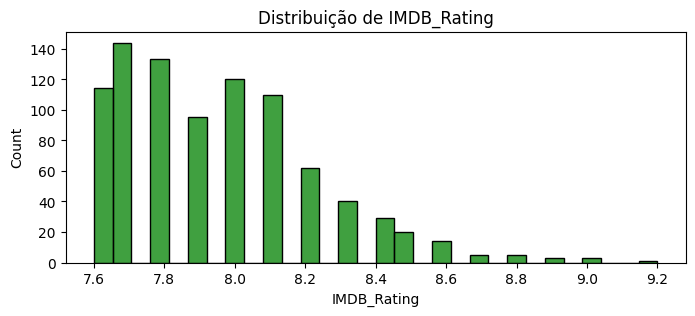

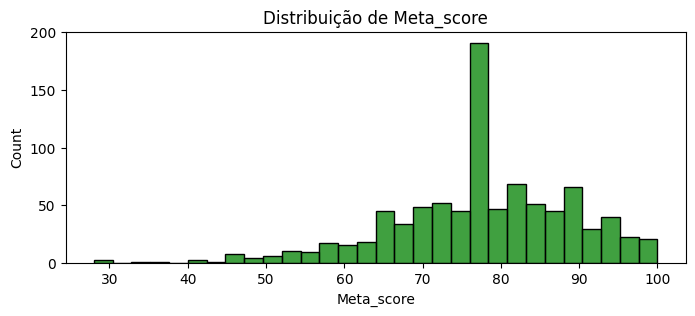

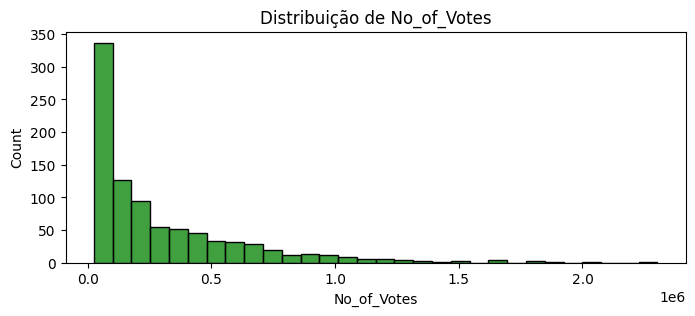

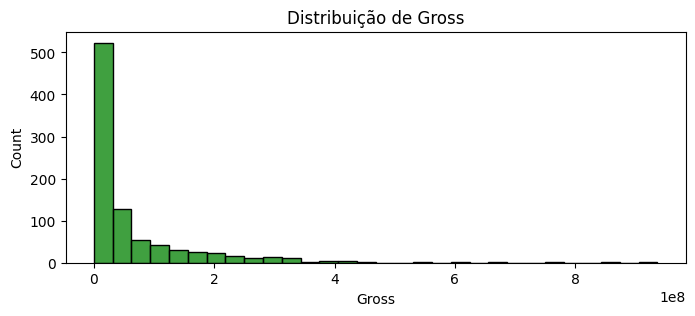

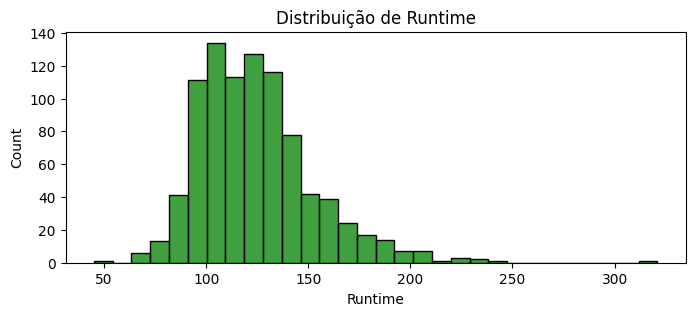

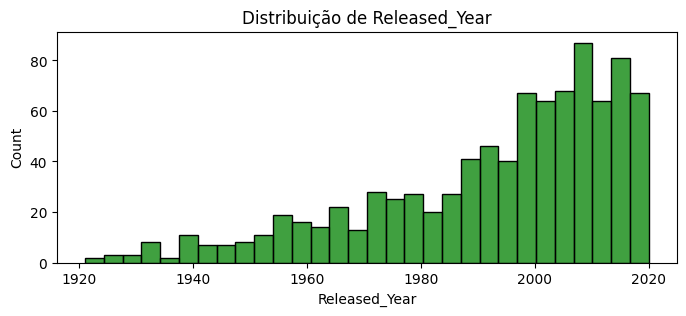

In [3]:
numericas = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year']

for col in numericas:
    plt.figure(figsize=(8,3))
    sns.histplot(df[col], bins= 30, color="green")
    plt.title(f'Distribuição de {col}')
    plt.show()


Se analizarmos bem os graficos, reparamos que a maior parte dos filmes possuem numero de votos e faturamento concentrado a esquerda, isso significa que na verdade os filmes em sua maioria possuem votos e faturamento em quantidade razoável.

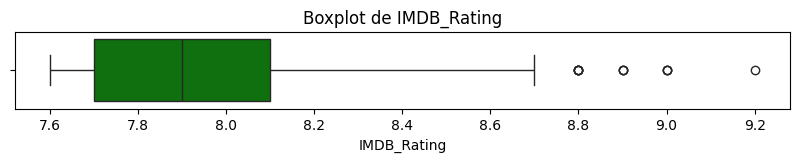

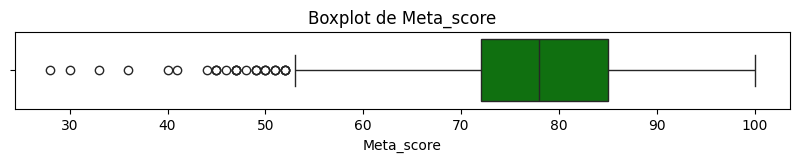

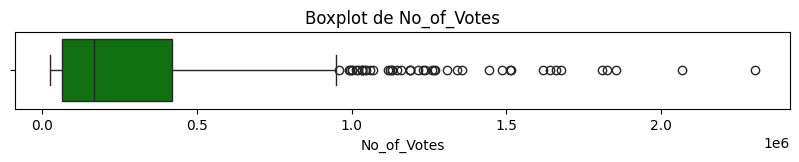

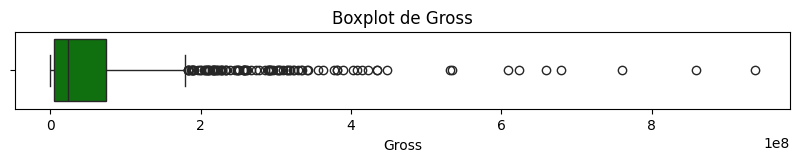

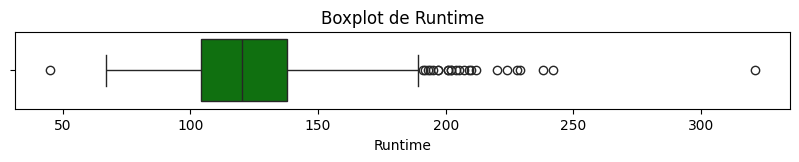

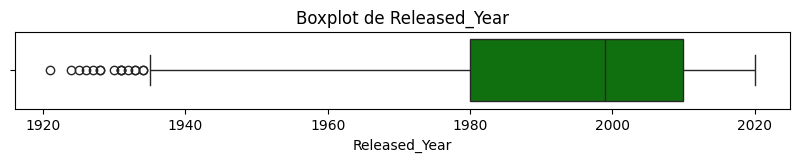

In [4]:

for col in numericas:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=df[col], color="green")
    plt.title(f'Boxplot de {col}')
    plt.show()


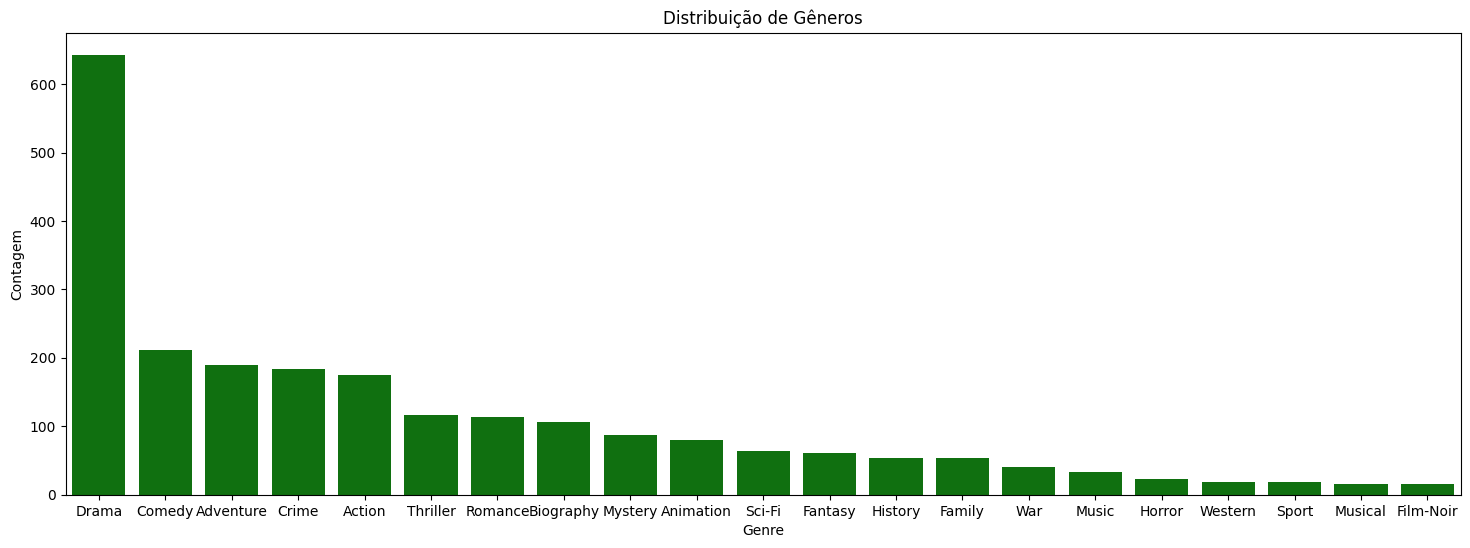

In [5]:
generos = df['Genre'].str.split(',').explode()
generos = generos.str.strip()

freq_genero = generos.value_counts()

plt.figure(figsize=(18,6))
sns.barplot(x=freq_genero.index, y=freq_genero.values, color="green")
plt.title('Distribuição de Gêneros')
plt.ylabel('Contagem')
plt.show()

Esses boxplots indicam que:

- Poucos filmes possuem IMDB maior que 8.7 ( o que leva a isso? )
- Dificilmente um filme terá MetaScore menor que 5.5
- Apenas alguns filmes possuem uma grande quantidade de votos e faturamento ( o que leva a isso? )
- Poucos filmes tem duração acima de 3h
- Maior parte dos filmes da categoria Drama 

In [6]:
df.sort_values(by="IMDB_Rating", ascending=False).head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Faixa_etaria,Faixa_etaria_texto
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,2,Adulto
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,1,Adolescentes
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,2,Adulto
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,0,Livre
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,0,Livre
5,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0,2,Adulto
6,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0,2,Adulto
7,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0,1,Adolescentes
8,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0,2,Adulto
9,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0,0,Livre


Praticamente todos os filmes de sucesso no IMDB são de Drama, entao com certeza o proximo filme produzido necessita ser de drama

In [7]:
df.sort_values(by="Gross", ascending=False).head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Faixa_etaria,Faixa_etaria_texto
426,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,0,Livre
56,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,1,Adolescentes
554,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,1,Adolescentes
57,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0,1,Adolescentes
581,Titanic,1997,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0,1,Adolescentes
325,The Avengers,2012,UA,143,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0,1,Adolescentes
797,Incredibles 2,2018,UA,118,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0,1,Adolescentes
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,1,Adolescentes
519,Rogue One,2016,UA,133,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0,1,Adolescentes
60,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0,1,Adolescentes


E praticamente todos filmes que tiveram o maior faturamento é de Ação + Aventura

In [8]:
df.sort_values(by="Meta_score", ascending=False).head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Faixa_etaria,Faixa_etaria_texto
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,2,Adulto
117,Citizen Kane,1941,UA,119,"Drama, Mystery",8.3,Following the death of publishing tycoon Charl...,100.0,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,403351,1585634.0,1,Adolescentes
114,Vertigo,1958,A,128,"Mystery, Romance, Thriller",8.3,A former police detective juggles wrestling wi...,100.0,Alfred Hitchcock,James Stewart,Kim Novak,Barbara Bel Geddes,Tom Helmore,364368,3200000.0,2,Adulto
111,Lawrence of Arabia,1962,U,228,"Adventure, Biography, Drama",8.3,"The story of T.E. Lawrence, the English office...",100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,44824144.0,0,Livre
77,Rear Window,1954,U,112,"Mystery, Thriller",8.4,A wheelchair-bound photographer spies on his n...,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,36764313.0,0,Livre
400,Sweet Smell of Success,1957,Approved,96,"Drama, Film-Noir",8.0,Powerful but unethical Broadway columnist J.J....,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,28137,23457439.5,0,Livre
386,Il conformista,1970,UA,113,Drama,8.0,A weak-willed Italian man becomes a fascist fl...,100.0,Bernardo Bertolucci,Jean-Louis Trintignant,Stefania Sandrelli,Gastone Moschin,Enzo Tarascio,27067,541940.0,1,Adolescentes
258,Fanny och Alexander,1982,A,188,Drama,8.1,Two young Swedish children experience the many...,100.0,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,57784,4971340.0,2,Adulto
244,Trois couleurs: Rouge,1994,U,99,"Drama, Mystery, Romance",8.1,A model discovers a retired judge is keen on i...,100.0,Krzysztof Kieslowski,Irène Jacob,Jean-Louis Trintignant,Frédérique Feder,Jean-Pierre Lorit,90729,4043686.0,0,Livre
48,Casablanca,1942,U,102,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,1024560.0,0,Livre


Novamente o Drama prevalece, entao acredito que um Filme que consiga misturar Drama, Ação e Aventura seja uma boa pedida, mas algo bem feito!

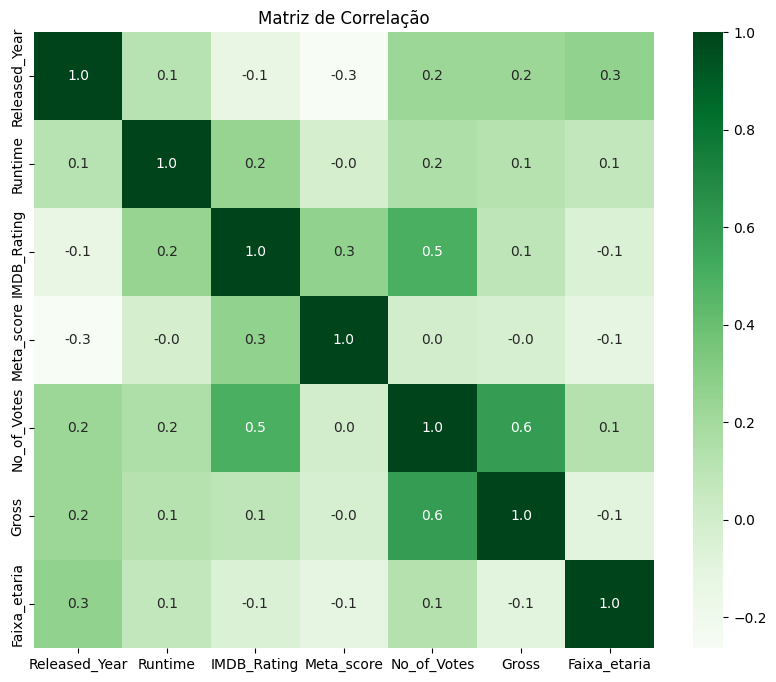

In [9]:
numericas = ["Released_Year","Runtime","IMDB_Rating","Meta_score","No_of_Votes","Gross","Faixa_etaria"]

correlacao = df[numericas].corr()

plt.figure(figsize=(10,8))        
sns.heatmap(correlacao, annot=True, cmap='Greens', fmt=".1f")  # fmt=".2f" mostra 2 casas decimais
plt.title('Matriz de Correlação')
plt.show()

Aqui encontramos duas correlaçoes moderadas, NumeroVotos x IMBD de 0.5 e NumeroVotos x faturamento 0.6:

- Há uma relação positiva moderada: filmes com mais votos tendem a ter nota ligeiramente maior, mas não é uma regra absoluta apenas uma tendência.
- A relação é um pouco mais forte: filmes com mais votos tendem a faturar mais, porem tambem é uma tendência.

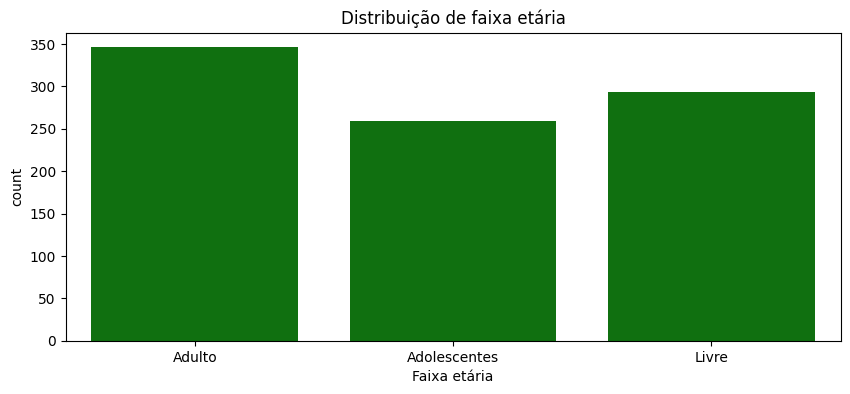

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x='Faixa_etaria_texto', data=df, color="green").set_xlabel('Faixa etária')
plt.title('Distribuição de faixa etária')
plt.show()

In [11]:
pd.DataFrame({
    'Quantidade': df['Faixa_etaria_texto'].value_counts(),
    'Media_Gross': df.groupby('Faixa_etaria_texto')['Gross'].mean().round(2),
    'Media_IMDB': df.groupby('Faixa_etaria_texto')['IMDB_Rating'].mean().round(2),
    'Media_No_of_Votes': df.groupby('Faixa_etaria_texto')['No_of_Votes'].mean().round(2),
    'Media_Meta_score': df.groupby('Faixa_etaria_texto')['Meta_score'].mean().round(2),
})

,Quantidade,Media_Gross,Media_IMDB,Media_No_of_Votes,Media_Meta_score
Faixa_etaria_texto,,,,,
Adolescentes,259,92665574.57,7.92,336021.37,76.77
Adulto,346,45320690.70,7.94,327751.53,76.60
Livre,293,65983604.01,7.98,221568.85,79.54


Aqui conseguimos reparar que filmes do publico adolescente costumam faturar mais e a ter mais votos, porem filmes do publico livre possuem o IMDB e meta_score ligeiramente maior.

Minha recomedação até o momento seria produzir um filme para adolescentes, com um drama bem feito, ação envolvente e aventura!

In [12]:
df[["Runtime", "Gross"]].sort_values(by="Gross", ascending=False).head(10).mean()

Runtime          153.4
Gross      664071986.9
dtype: float64

In [13]:
df[["Runtime", "IMDB_Rating"]].sort_values(by="IMDB_Rating", ascending=False).head(10).mean()

Runtime        164.00
IMDB_Rating      8.93
dtype: float64

In [14]:
df[["Runtime", "Meta_score"]].sort_values(by="Meta_score", ascending=False).head(10).mean()

Runtime       136.0
Meta_score    100.0
dtype: float64

Produzir um filme de aproximadamente 155 minutos!

In [15]:
nota_diretores = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)
print("Top 5 Diretores com maiores notas:")
print(nota_diretores.head(2))

Top 5 Diretores com maiores notas:
Director
Lana Wachowski    8.7
Irvin Kershner    8.7
Name: IMDB_Rating, dtype: float64


In [16]:
nota_diretores = df.groupby('Director')['Gross'].mean().sort_values(ascending=False)
print("Top 5 Diretores com maiores faturamentos:")
print(nota_diretores.head(2))

Top 5 Diretores com maiores faturamentos:
Director
Anthony Russo     5.512599e+08
Gareth Edwards    5.321773e+08
Name: Gross, dtype: float64


Aqui depende do objetivo, se o objetivo do filme for obter uma maior nota, recomendaria Lana Wachowski ou Irvin Kershner, caso seja o faturamento, recomendaria Anthony Russo ou Gareth Edwards

In [17]:
todos_atores = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).reset_index(drop=True)

notas_repetidas = df['IMDB_Rating'].repeat(4).reset_index(drop=True)

df_atores = pd.DataFrame({
    'Actor': todos_atores,
    'IMDB_Rating': notas_repetidas
})

df_atores['Actor'] = df_atores['Actor'].str.strip()

media_atores = df_atores.groupby('Actor')['IMDB_Rating'].mean().sort_values(ascending=False)

print(media_atores.head(10))


Actor
Elijah Wood           9.0
John Travolta         9.0
Lilly Wachowski       9.0
Lin-Manuel Miranda    8.9
Daveigh Chase         8.9
Kátia Lund            8.9
Suriya                8.9
Éric Toledano         8.8
Rob Minkoff           8.8
Jean Reno             8.8
Name: IMDB_Rating, dtype: float64


Para o elenco de atores que mais tiveram IMDB temos:

- Lilly Wachowski
- John Travolta
- Elijah Wood
- Suriya
- Daveigh Chase
- Lin-Manuel Miranda
- Kátia Lund
- Éric Toledano
- Anthony Perkins
- Tsutomu Tatsumi

In [18]:
todos_atores = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).reset_index(drop=True)

notas_repetidas = df['Gross'].repeat(4).reset_index(drop=True)

df_atores = pd.DataFrame({
    'Actor': todos_atores,
    'Gross': notas_repetidas
})

df_atores['Actor'] = df_atores['Actor'].str.strip()

media_atores = df_atores.groupby('Actor')['Gross'].mean().sort_values(ascending=False)

print(media_atores.head(10))


Actor
Michael Peña           936662225.0
Mirai Shida            936662225.0
Maria Doyle Kennedy    760507625.0
Samantha Isler         760507625.0
David Silverman        678815482.0
Emilio Echevarría      678815482.0
Kazuya Tsurumaki       678815482.0
Scott Adsit            659325379.0
Mehdi Nebbou           659325379.0
Miori Takimoto         659325379.0
Name: Gross, dtype: float64


Para o elenco de atores que mais tiveram fatura temos:

- Michael Peña
- Mirai Shida
- Maria Doyle Kennedy
- Samantha Isler
- David Silverman
- Emilio Echevarría
- Kazuya Tsurumaki
- Mehdi Nebbou
- Scott Adsit
- Miori Takimoto

### Qual filme eu recomendaria?

In [19]:
df.sort_values(by=["IMDB_Rating", "Meta_score"], ascending=[False, False] ).head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Faixa_etaria,Faixa_etaria_texto
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,2,Adulto
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,0,Livre


Recomendaria "The Godfather" baseado na pontuação IMDB e no MetaSore, isso levando em conta que a pessoa é adulta!

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Os principais fatores relacionados a um alto faturamento são:

- Meta_score elevado: filmes bem avaliados pela crítica tendem a apresentar melhor desempenho financeiro, como evidenciado na matriz de correlação
- Categorias populares: gêneros como Drama, Ação e Aventura se destacam, pois concentram a maioria dos filmes de grande sucesso
- Elenco renomado: atores já reconhecidos pelo público, especialmente aqueles com histórico positivo em produções desses gêneros, aumentam a visibilidade do filme
- Qualidade narrativa e produção: histórias bem construídas, que emocionam e envolvem a audiência, também se mostram determinantes para o sucesso de bilheteria

### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

A coluna Overview traz os resumos dos filmes e pode gerar alguns insights interessantes. Seria possível fazer uma análise de sentimento, para ver se descrições dos filmes de sucesso e entender o porque atraem mais público. Também dá para extrair palavras-chave que ajudam a identificar gêneros e tendências. Também é possível até tentar prever o gênero do filme usando técnicas de NLP (processamento de linguagem natural).

### Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Para prever a nota do IMDB, eu trataria o problema como regressão, já que a nota é um valor numérico. As variáveis mais úteis seriam:

- Meta_score (avaliação da crítica)
- Runtime (duração do filme)
- No_of_Votes (popularidade do filme)
- Gross (faturamento)
- Genre (transformado em variáveis dummies, pois é categórico)

Essas variáveis foram escolhidas porque são objetivas, disponíveis antes do lançamento e têm relação com avaliação IMDB do filme<br>
O modelo que eu utilizaria seria um Random Forest Regressor, porque ele consegue lidar bem com dados numéricos e categóricos, além de capturar relações não lineares, alem de ser robusto e ter boa performance sem muito ajuste.<br>
A métrica escolhida seria o RMSE (Root Mean Squared Error), porque mostra de forma clara o erro médio das previsões na mesma escala da nota do IMDB